In [ ]:
''' 
Annotate Joanito et al. cell types in more detail (Extended Data Fig. ??)
'''

In [1]:
import numpy as np 
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [146]:
DIRECTORY_OUT = '/node200data/18parkky/datasets/data/public/processed_data/CRC_MSI_intensity_analysis_clean_data'

PATH_TO_JOANITO_ADATA   = f'{DIRECTORY_OUT}/adata_j.preprocessed.NanoMnT.TumorLabeled.h5ad'
PATH_TO_SMILLIE_MARKER_GENES = '/node200data/18parkky/datasets/reference/marker_genes/colon/Smillie_et_al/colon_epithelial_marker.csv'

In [3]:
adata_j = sc.read_h5ad(PATH_TO_JOANITO_ADATA)

## Load data

In [12]:
def preprocess( adata, n_neighbors=10, batch_key="SampleID" ):
    sc.pp.normalize_total(adata)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key=batch_key)
    
    adata.raw = adata.copy()
    adata = adata[:, adata.var.highly_variable]

    sc.pp.scale(adata, max_value=10)
    sc.tl.pca(adata, svd_solver="arpack")
    
    sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=40)
    sc.tl.umap(adata, random_state=42)
    
    return adata

In [5]:
dict_Identifier_to_lvl_1_CellType = dict()
dict_Identifier_to_lvl_2_CellType = dict()

In [31]:
adata_j_TME = adata_j[adata_j.obs['Manual_CellType_lvl_1']!='Tumor epithelial'].copy()
adata_j_TME = adata_j_TME.raw.to_adata()

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


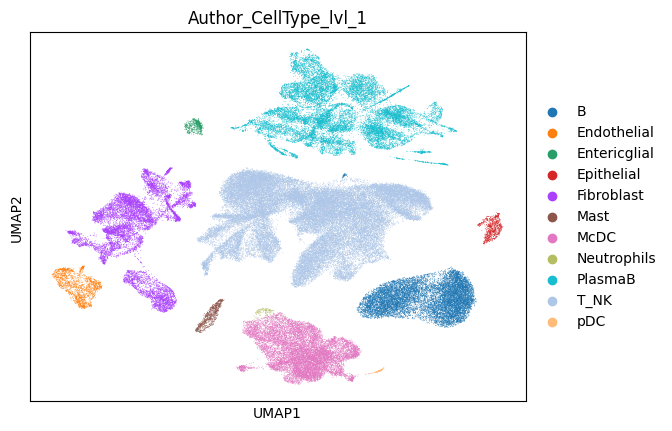

In [32]:
adata_j_TME = preprocess(adata_j_TME, n_neighbors=15)

sc.tl.leiden(adata_j_TME, resolution=0.1, key_added='leiden_res_0.1')
sc.pl.umap(adata_j_TME, color=['Author_CellType_lvl_1'])

## B & Plasma cells

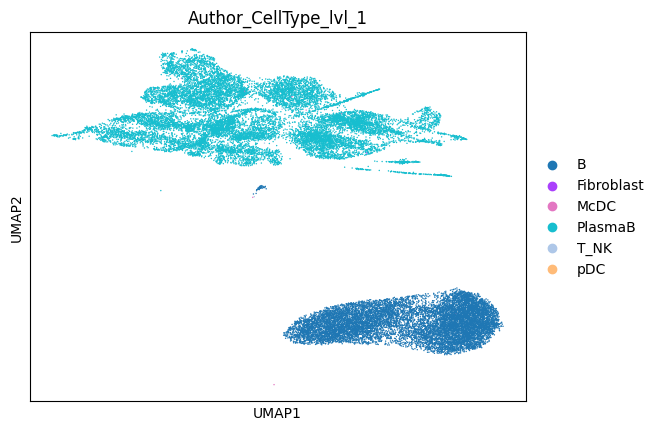

In [33]:
adata_j_TME_B = adata_j_TME[adata_j_TME.obs['leiden_res_0.1'].isin(['3', '4', '6',])].copy()
sc.pl.umap(adata_j_TME_B, color=['Author_CellType_lvl_1'])
adata_j_TME_B = adata_j_TME_B.raw.to_adata()

/tmp/ipykernel_286411/2580326954.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for SampleID, edf in adata_j_TME_B.obs.groupby('SampleID'):


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


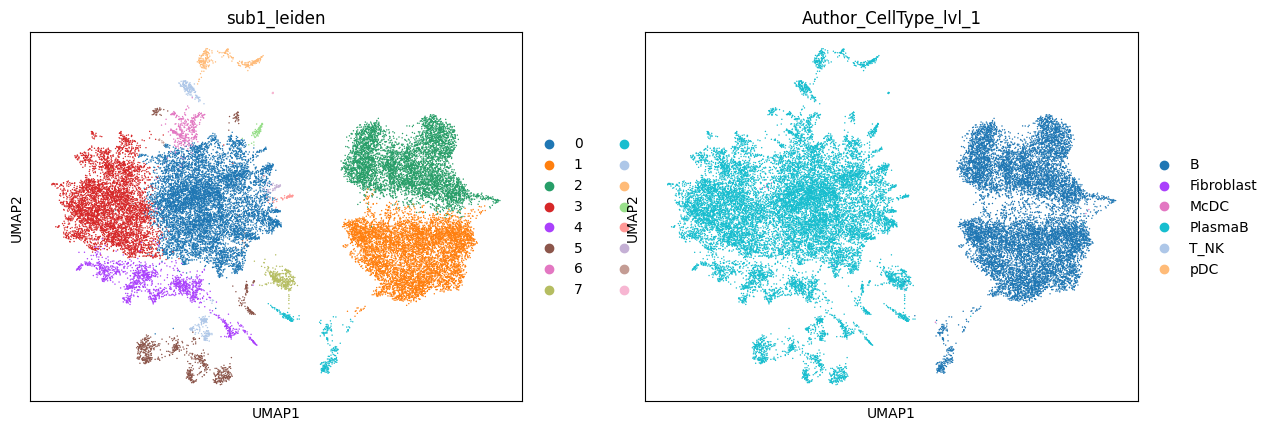

In [34]:
temp = list()
for SampleID, edf in adata_j_TME_B.obs.groupby('SampleID'):
    if len(edf) <= 1:
        temp.append( SampleID )
        dict_Identifier_to_lvl_1_CellType[edf.iloc[0].Identifier] = 'Plasma'
        dict_Identifier_to_lvl_2_CellType[edf.iloc[0].Identifier] = 'N/A'

adata_j_TME_B = adata_j_TME_B[~(adata_j_TME_B.obs['SampleID'].isin(temp))].copy()

adata_j_TME_B = preprocess(adata_j_TME_B)
sc.tl.leiden(adata_j_TME_B, resolution=0.3, key_added='sub1_leiden',)
sc.pl.umap(adata_j_TME_B, color=['sub1_leiden', 'Author_CellType_lvl_1'], )

### Sub-clustering: sub1_leiden 0, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14

In [68]:
# Plasma cells

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


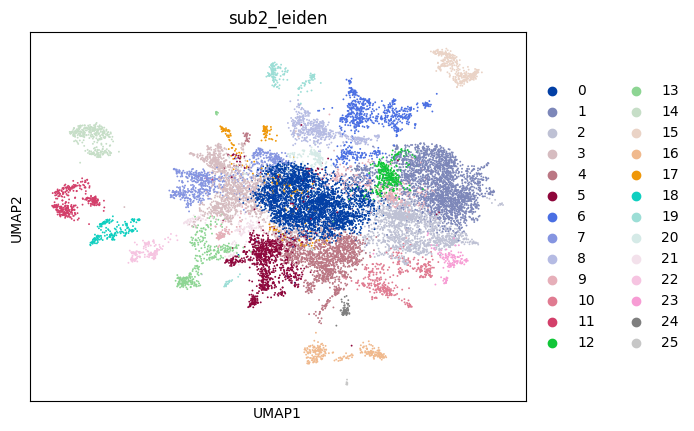

In [35]:
adata_j_TME_B_Plasma = adata_j_TME_B[~(adata_j_TME_B.obs['sub1_leiden'].isin(['1', '2', '8']))].copy()
adata_j_TME_B_Plasma = adata_j_TME_B_Plasma.raw.to_adata()

adata_j_TME_B_Plasma = preprocess(adata_j_TME_B_Plasma, batch_key=None)
sc.tl.leiden(adata_j_TME_B_Plasma, resolution=0.5, key_added='sub2_leiden')
sc.pl.umap(adata_j_TME_B_Plasma, color=['sub2_leiden'])

#### Sub-clustering: sub2_leiden 6, 9, 10, 15

/tmp/ipykernel_286411/3226224267.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for SampleID, edf in adata_j_TME_B_Plasma_subset1.obs.groupby('SampleID'):
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:412: UserWarning: `n_top_genes` > number of normalized dispersions, returning all genes with normalized dispersions.
  warnings.warn(msg, UserWarning)
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


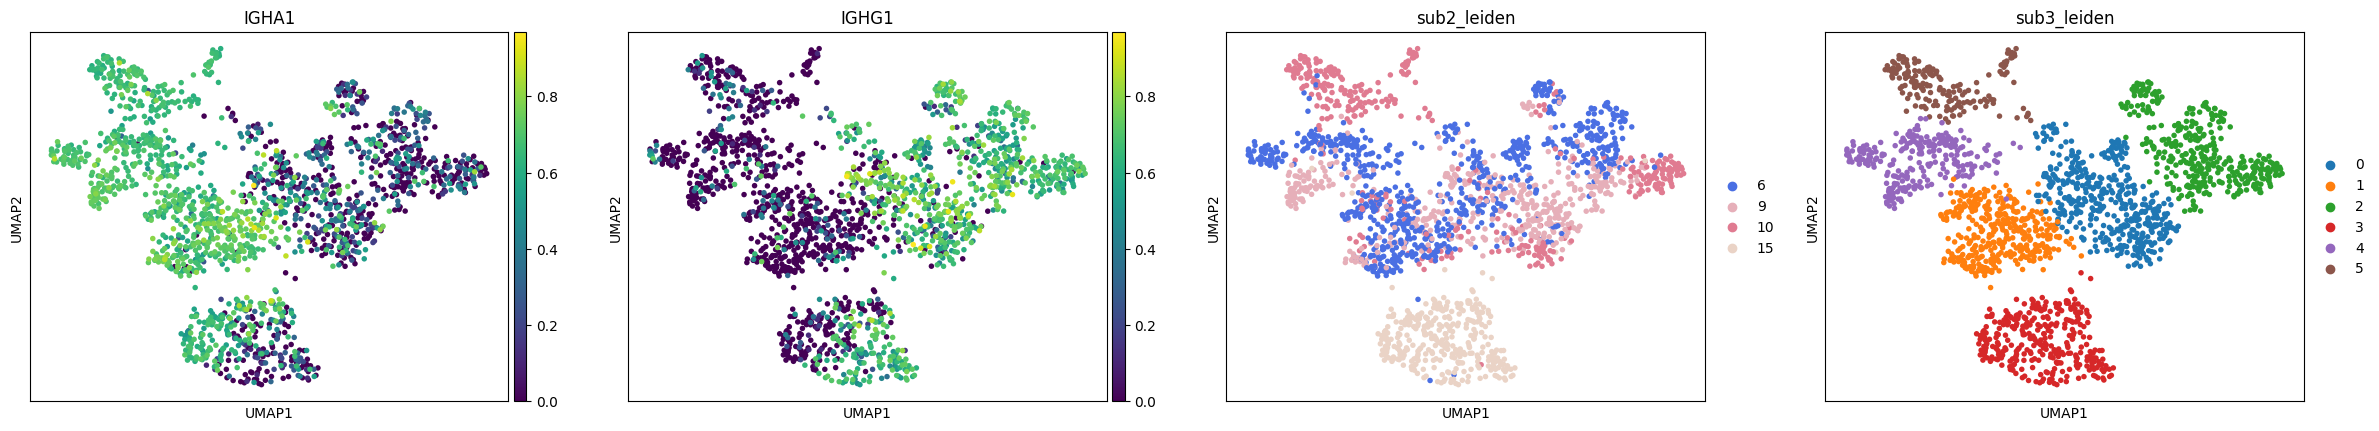

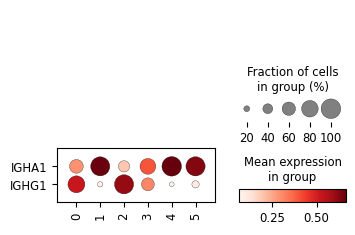

In [36]:
adata_j_TME_B_Plasma_subset1 = adata_j_TME_B_Plasma[adata_j_TME_B_Plasma.obs['sub2_leiden'].isin(['6', '9', '10', '15'])].copy()
adata_j_TME_B_Plasma_subset1 = adata_j_TME_B_Plasma_subset1.raw.to_adata()

temp = list()
for SampleID, edf in adata_j_TME_B_Plasma_subset1.obs.groupby('SampleID'):
    if len(edf) <= 1:
        temp.append( SampleID )
        dict_Identifier_to_lvl_1_CellType[edf.iloc[0].Identifier] = 'Plasma'
        dict_Identifier_to_lvl_2_CellType[edf.iloc[0].Identifier] = 'N/A'

adata_j_TME_B_Plasma_subset1 = adata_j_TME_B_Plasma_subset1[~(adata_j_TME_B_Plasma_subset1.obs['SampleID'].isin(temp))].copy()

adata_j_TME_B_Plasma_subset1 = preprocess(adata_j_TME_B_Plasma_subset1)
sc.tl.leiden(adata_j_TME_B_Plasma_subset1, resolution=0.3, key_added='sub3_leiden')
sc.pl.umap(adata_j_TME_B_Plasma_subset1, color=['IGHA1', 'IGHG1', 'sub2_leiden', 'sub3_leiden'], ncols=4)
sc.pl.dotplot(adata_j_TME_B_Plasma_subset1, var_names=['IGHA1', 'IGHG1',], groupby='sub3_leiden', swap_axes=True)

##### sub3_leiden 0 → Mixture of IGHA+ and IGHG+ Plasma

/tmp/ipykernel_286411/3159992484.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for SampleID, edf in adata_j_TME_B_Plasma_subset1_l0.obs.groupby('SampleID'):
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:305: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:412: UserWarning: `n_top_genes` > number of normalized dispersions, returning all genes with normalized dispersions.
  warnings.warn(msg, UserWarning)
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:412: UserWarning: `n_top_genes` > number of normalized 

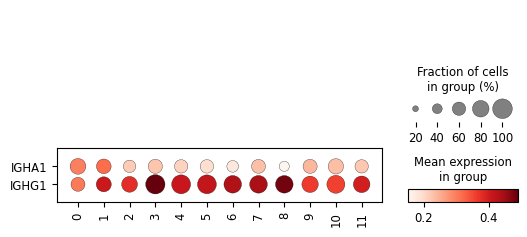

In [37]:
adata_j_TME_B_Plasma_subset1_l0 = adata_j_TME_B_Plasma_subset1[adata_j_TME_B_Plasma_subset1.obs['sub3_leiden'].isin(['0',])].copy()
adata_j_TME_B_Plasma_subset1_l0 = adata_j_TME_B_Plasma_subset1_l0.raw.to_adata()

temp = list()
for SampleID, edf in adata_j_TME_B_Plasma_subset1_l0.obs.groupby('SampleID'):
    if len(edf) <= 1:
        temp.append( SampleID )
        dict_Identifier_to_lvl_1_CellType[edf.iloc[0].Identifier] = 'Plasma'
        dict_Identifier_to_lvl_2_CellType[edf.iloc[0].Identifier] = 'N/A'

adata_j_TME_B_Plasma_subset1_l0 = adata_j_TME_B_Plasma_subset1_l0[~(adata_j_TME_B_Plasma_subset1_l0.obs['SampleID'].isin(temp))].copy()

adata_j_TME_B_Plasma_subset1_l0 = preprocess(adata_j_TME_B_Plasma_subset1_l0, n_neighbors=5)
sc.tl.leiden(adata_j_TME_B_Plasma_subset1_l0, resolution=1.0, key_added='sub4_leiden')
sc.pl.dotplot(adata_j_TME_B_Plasma_subset1_l0, var_names=['IGHA1', 'IGHG1',], groupby='sub4_leiden', swap_axes=True)

In [38]:
for tup in adata_j_TME_B_Plasma_subset1_l0[(adata_j_TME_B_Plasma_subset1_l0.obs['sub4_leiden'].isin(['8',]))].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Plasma'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'IGHG+ Plasma'
    
for tup in adata_j_TME_B_Plasma_subset1_l0[~(adata_j_TME_B_Plasma_subset1_l0.obs['sub4_leiden'].isin(['8']))].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Plasma'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'N/A'

##### sub3_leiden 3 → Mixture of IGHA+ and IGHG+ Plasma

/tmp/ipykernel_286411/765012629.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for SampleID, edf in adata_j_TME_B_Plasma_subset1_l3.obs.groupby('SampleID'):
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:412: UserWarning: `n_top_genes` > number of normalized dispersions, returning all genes with normalized dispersions.
  warnings.warn(msg, UserWarning)
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


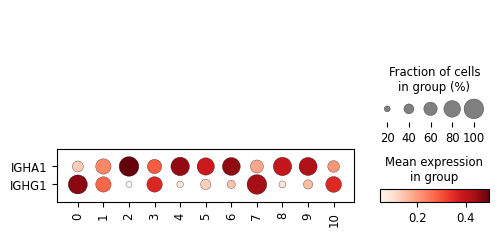

In [39]:
adata_j_TME_B_Plasma_subset1_l3 = adata_j_TME_B_Plasma_subset1[adata_j_TME_B_Plasma_subset1.obs['sub3_leiden'].isin(['3',])].copy()
adata_j_TME_B_Plasma_subset1_l3 = adata_j_TME_B_Plasma_subset1_l3.raw.to_adata()

temp = list()
for SampleID, edf in adata_j_TME_B_Plasma_subset1_l3.obs.groupby('SampleID'):
    if len(edf) <= 1:
        temp.append( SampleID )
        dict_Identifier_to_lvl_1_CellType[edf.iloc[0].Identifier] = 'Plasma'
        dict_Identifier_to_lvl_2_CellType[edf.iloc[0].Identifier] = 'N/A'

adata_j_TME_B_Plasma_subset1_l3 = adata_j_TME_B_Plasma_subset1_l3[~(adata_j_TME_B_Plasma_subset1_l3.obs['SampleID'].isin(temp))].copy()
adata_j_TME_B_Plasma_subset1_l3 = preprocess(adata_j_TME_B_Plasma_subset1_l3, n_neighbors=5)

sc.tl.leiden(adata_j_TME_B_Plasma_subset1_l3, resolution=1.0, key_added='sub4_leiden')
sc.pl.dotplot(adata_j_TME_B_Plasma_subset1_l3, var_names=['IGHA1', 'IGHG1',], groupby='sub4_leiden', swap_axes=True)

In [40]:
for tup in adata_j_TME_B_Plasma_subset1_l3[(adata_j_TME_B_Plasma_subset1_l3.obs['sub4_leiden'].isin(['0', '7',]))].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Plasma'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'IGHG+ Plasma'
    
for tup in adata_j_TME_B_Plasma_subset1_l3[(adata_j_TME_B_Plasma_subset1_l3.obs['sub4_leiden'].isin(['2', '4', '5', '6', '8', '9']))].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Plasma'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'IGHA+ Plasma'
    
for tup in adata_j_TME_B_Plasma_subset1_l3[(adata_j_TME_B_Plasma_subset1_l3.obs['sub4_leiden'].isin(['1', '3', '10']))].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Plasma'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'N/A'

##### other leidens

In [41]:
for tup in adata_j_TME_B_Plasma_subset1[(adata_j_TME_B_Plasma_subset1.obs['sub3_leiden'].isin(['1', '4', '5']))].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Plasma'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'IGHA+ Plasma'
    
for tup in adata_j_TME_B_Plasma_subset1[(adata_j_TME_B_Plasma_subset1.obs['sub3_leiden'].isin(['2']))].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Plasma'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'IGHG+ Plasma'

#### sub2_leiden 1, 2, 12, 23 → IGHG+ Plasma

In [42]:
for tup in adata_j_TME_B_Plasma[adata_j_TME_B_Plasma.obs['sub2_leiden'].isin(['1', '2', '12', '23'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Plasma'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'IGHG+ Plasma'

#### sub2_leiden 0, 3, 4, 5, 7, 8, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 24, 25 → IGHA+ Plasma

In [43]:
for tup in adata_j_TME_B_Plasma[~(adata_j_TME_B_Plasma.obs['sub2_leiden'].isin(['1', '2', '6', '9', '10', '12', '15', '23']))].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Plasma'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'IGHA+ Plasma'

### Sub-clustering: sub1_leiden 1, 2, 8

In [ ]:
# B cells

In [45]:
adata_j_TME_B_B = adata_j_TME_B[(adata_j_TME_B.obs['sub1_leiden'].isin(['1', '2', '8']))].copy()
adata_j_TME_B_B = adata_j_TME_B_B.raw.to_adata()

IGK_gene = list()
for gene in adata_j_TME_B_B.var.index:
    if ('IGKV' == gene[:4]) or ('IGLV' == gene[:4]) or ('IGHV' == gene[:4]):
        IGK_gene.append(gene)
        
adata_j_TME_B_B = adata_j_TME_B_B[:, ~(adata_j_TME_B_B.var.index.isin( IGK_gene ))]

adata_j_TME_B_B = preprocess(adata_j_TME_B_B, batch_key=None)
sc.tl.leiden(adata_j_TME_B_B, resolution=0.5, key_added='sub2_leiden')

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


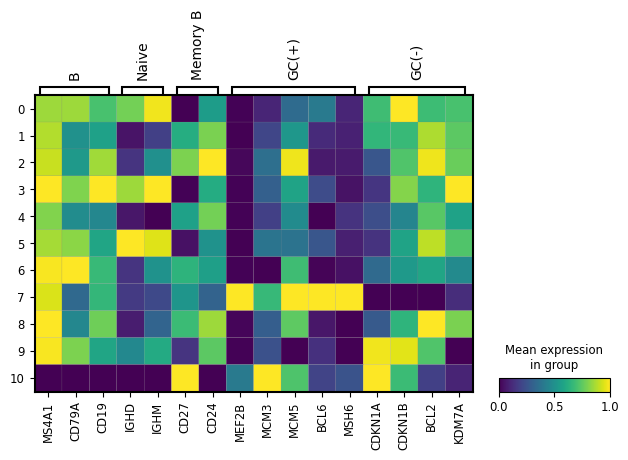

In [46]:
# https://pmc.ncbi.nlm.nih.gov/articles/PMC6813733/#:~:text=Na%C3%AFve%20B%20Cells%20(N%3A%20Canonical,levels%20than%20in%20transitional%20cells.
    # Transitional B Cells (T; Canonical Phenotype: CD19+, IgDlo/+, CD27–, CD24++, CD38++)
    # Naïve B Cells (N: Canonical Phenotype: CD19+, IgD+, CD27–, CD38+/–, CD24+/–)
    # Memory B Cells (M; Canonical Phenotype: CD19+, CD27+, CD38+/–, CD24+/–)

# GC: https://www.sciencedirect.com/science/article/pii/S1535610818303660?via%3Dihub

B_markers = { 'B' : ['MS4A1', 'CD79A', 'CD19'], 
            'Naive' : ["IGHD", 'IGHM', ],
            'Memory B' : ['CD27', 'CD24'], 
            # 'Activated B' : ['IGHA1', 'IGHG1', ],
            'GC(+)' : ['MEF2B', 'MCM3', 'MCM5', 'BCL6', 'MSH6', ], 
            'GC(-)' : ['CDKN1A', 'CDKN1B', 'BCL2', 'KDM7A'],  # BCL2 is negative marker
}

sc.pl.matrixplot(adata_j_TME_B_B, var_names=B_markers, 
              groupby='sub2_leiden', 
              standard_scale='var',
              )

#### sub2_leiden 0, 3, 5 → Naive B

In [49]:
for tup in adata_j_TME_B_B.obs.itertuples():
    if tup.sub2_leiden in ['0', '3', '5',]:
        dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'B'
        dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'Naive B'

#### sub2_leiden 1, 2, 4, 8 → Memory B

In [50]:
for tup in adata_j_TME_B_B.obs.itertuples():
    if tup.sub2_leiden in ['1', '2', '4', '8']:
        dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'B'
        dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'Memory B'

#### sub2_leiden 7 → GC B

In [51]:
for tup in adata_j_TME_B_B.obs.itertuples():
    if tup.sub2_leiden in ['7']:
        dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'B'
        dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'GC B'

#### sub2_leiden 6, 9, 10 → N/A

In [52]:
for tup in adata_j_TME_B_B.obs.itertuples():
    if tup.sub2_leiden in ['6', '9', '10']:
        dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'B'
        dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'N/A'

### Omitted leiden_res_0.1=12 → IGHA+ Plasma

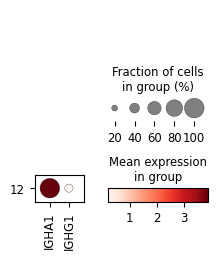

In [241]:
sc.pl.dotplot(adata_j_TME[(adata_j_TME.obs['leiden_res_0.1']=='12')], var_names=['IGHA1', 'IGHG1'], groupby='leiden_res_0.1')

In [242]:
for tup in adata_j_TME[(adata_j_TME.obs['leiden_res_0.1']=='12')].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Plasma'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'Plasma'

## T & NK cells

In [ ]:
adata_j_TME_T_NK = adata_j_TME[adata_j_TME.obs['leiden_res_0.1'].isin(['0', '1'])].copy()
adata_j_TME_T_NK = adata_j_TME_T_NK.raw.to_adata()

temp = list()
for SampleID, edf in adata_j_TME_T_NK.obs.groupby('SampleID'):
    if len(edf) <= 1:
        temp.append( SampleID )
        dict_Identifier_to_lvl_1_CellType[edf.iloc[0].Identifier] = 'N/A'
        dict_Identifier_to_lvl_2_CellType[edf.iloc[0].Identifier] = 'N/A'

adata_j_TME_T_NK = adata_j_TME_T_NK[~(adata_j_TME_T_NK.obs['SampleID'].isin(temp))].copy()
adata_j_TME_T_NK = preprocess(adata_j_TME_T_NK)
sc.tl.leiden(adata_j_TME_T_NK, resolution=0.2, key_added='sub1_leiden')

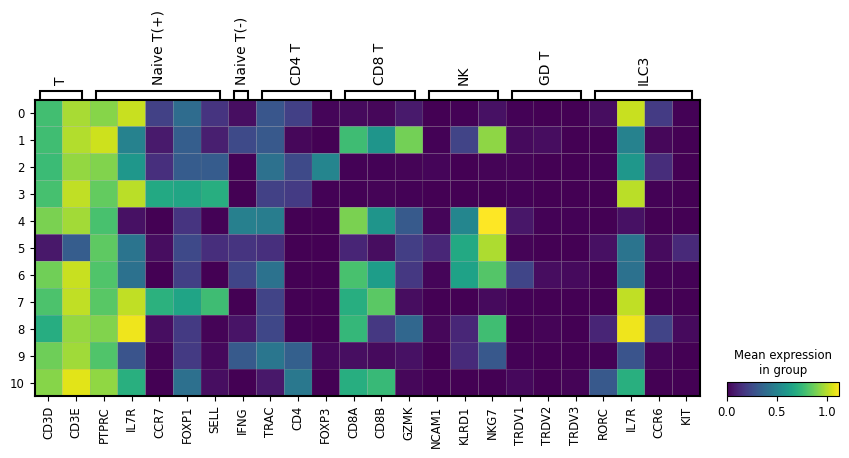

In [75]:
T_markers = {
    'T' : ['CD3D', 'CD3E', ],
    'Naive T(+)' : ['PTPRC', 'IL7R', 'CCR7', 'FOXP1', 'SELL',],
    'Naive T(-)' : ['IFNG'],
    'CD4 T' : ['TRAC', 'CD4', 'FOXP3'], 
    'CD8 T' : ['CD8A', 'CD8B', 'GZMK'],
    'NK' : ['NCAM1', 'KLRD1', 'NKG7'],
    'GD T' : ['TRDV1', 'TRDV2', 'TRDV3'],
    'ILC3' : ['RORC', 'IL7R', 'CCR6', 'KIT',],
}

sc.pl.matrixplot(adata_j_TME_T_NK, var_names=T_markers, groupby='sub1_leiden', swap_axes=False,)

### sub1_leiden 0, 2, 3, 9 → CD4+ T

In [268]:
for tup in adata_j_TME_T_NK[adata_j_TME_T_NK.obs['sub1_leiden'].isin(['0', '2', '3', '9'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'T'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'CD4+ T'

### sub1_leiden 4, 7, 8 → CD8+ T

In [269]:
for tup in adata_j_TME_T_NK[adata_j_TME_T_NK.obs['sub1_leiden'].isin(['4', '7', '8'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'T'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'CD8+ T'

### sub1_leiden 5 → Mixed populations

In [89]:
adata_j_TME_T_NK_l5 = adata_j_TME_T_NK[adata_j_TME_T_NK.obs['sub1_leiden'].isin(['5'])].copy()
adata_j_TME_T_NK_l5 = adata_j_TME_T_NK_l5.raw.to_adata()

temp = list()
for SampleID, edf in adata_j_TME_T_NK_l5.obs.groupby('SampleID'):
    if len(edf) <= 1:
        temp.append( SampleID )
        dict_Identifier_to_lvl_1_CellType[edf.iloc[0].Identifier] = 'N/A'
        dict_Identifier_to_lvl_2_CellType[edf.iloc[0].Identifier] = 'N/A'

adata_j_TME_T_NK_l5 = adata_j_TME_T_NK_l5[~(adata_j_TME_T_NK_l5.obs['SampleID'].isin(temp))].copy()

sc.pp.normalize_total(adata_j_TME_T_NK_l5)
sc.pp.log1p(adata_j_TME_T_NK_l5)
sc.pp.highly_variable_genes(adata_j_TME_T_NK_l5, n_top_genes=1000, batch_key='SampleID')

adata_j_TME_T_NK_l5.raw = adata_j_TME_T_NK_l5.copy()
adata_j_TME_T_NK_l5 = adata_j_TME_T_NK_l5[:, adata_j_TME_T_NK_l5.var.highly_variable]

sc.pp.scale(adata_j_TME_T_NK_l5, max_value=10)
sc.tl.pca(adata_j_TME_T_NK_l5, svd_solver="arpack")

sc.pp.neighbors(adata_j_TME_T_NK_l5, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_j_TME_T_NK_l5, random_state=42)
sc.tl.leiden(adata_j_TME_T_NK_l5, resolution=0.5, key_added='sub2_leiden')

/tmp/ipykernel_286411/1969091036.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for SampleID, edf in adata_j_TME_T_NK_l5.obs.groupby('SampleID'):
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


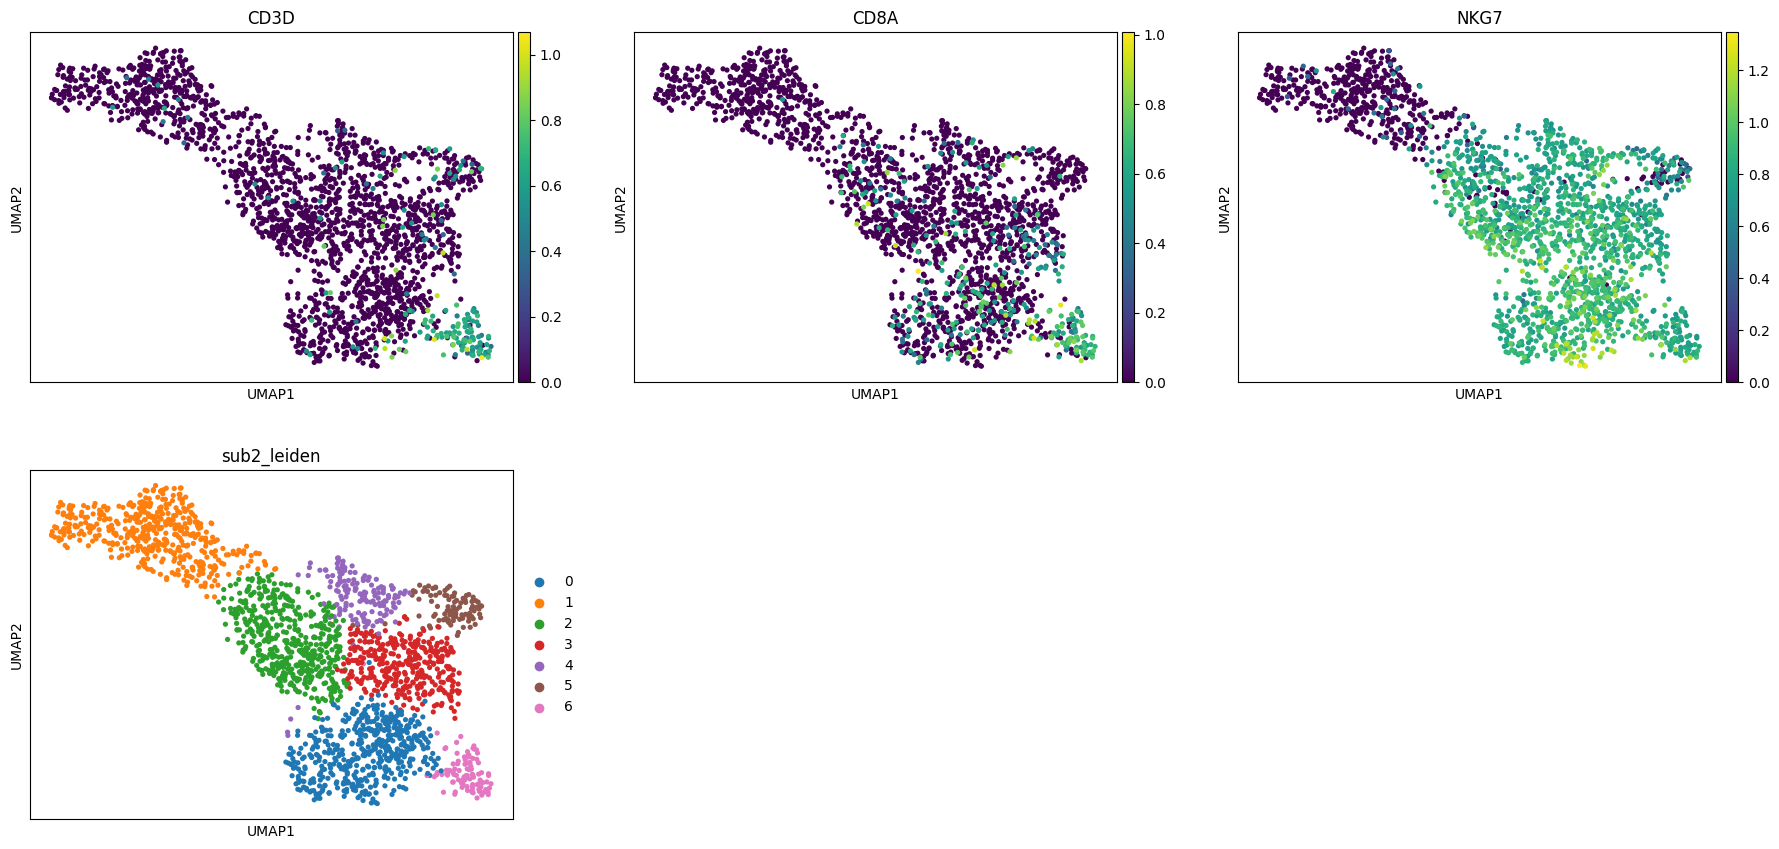

In [263]:
sc.pl.umap(adata_j_TME_T_NK_l5, color=['CD3D', 'CD8A', 'NKG7', 'sub2_leiden'], ncols=3)

#### sub2_leiden 1 → ILC3

In [267]:
for tup in adata_j_TME_T_NK_l5[adata_j_TME_T_NK_l5.obs['sub2_leiden'].isin(['1'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'T'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'ILC3'

#### sub2_leiden 6 → CD8+ T

In [266]:
for tup in adata_j_TME_T_NK_l5[adata_j_TME_T_NK_l5.obs['sub2_leiden'].isin(['6'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'T'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'CD8+ T'

#### All other sub2_leidens → NK

In [265]:
for tup in adata_j_TME_T_NK_l5[~(adata_j_TME_T_NK_l5.obs['sub2_leiden'].isin(['1', '6']))].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'NK'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'NK'

### sub1_leiden 1, 6 → Mixture of ab and gd CD8+ T

In [94]:
adata_j_TME_T_NK_subset = adata_j_TME_T_NK[adata_j_TME_T_NK.obs['sub1_leiden'].isin(['1', '6'])].copy()
adata_j_TME_T_NK_subset = adata_j_TME_T_NK_subset.raw.to_adata()

temp = list()
for SampleID, edf in adata_j_TME_T_NK_subset.obs.groupby('SampleID'):
    if len(edf) <= 1:
        temp.append( SampleID )
        dict_Identifier_to_lvl_1_CellType[edf.iloc[0].Identifier] = 'T'
        dict_Identifier_to_lvl_2_CellType[edf.iloc[0].Identifier] = 'N/A'

adata_j_TME_T_NK_subset = adata_j_TME_T_NK_subset[~(adata_j_TME_T_NK_subset.obs['SampleID'].isin(temp))].copy()

adata_j_TME_T_NK_subset = preprocess(adata_j_TME_T_NK_subset, )
sc.tl.leiden(adata_j_TME_T_NK_subset, resolution=0.5, key_added='sub2_leiden')

/tmp/ipykernel_286411/2542037174.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for SampleID, edf in adata_j_TME_T_NK_subset.obs.groupby('SampleID'):
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


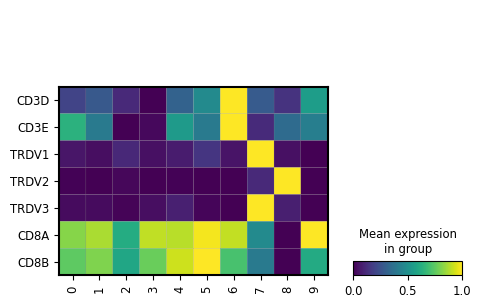

In [96]:
sc.pl.matrixplot( adata_j_TME_T_NK_subset, groupby='sub2_leiden', var_names=['CD3D', 'CD3E', 'TRDV1', 'TRDV2', 'TRDV3', 'CD8A', 'CD8B',], swap_axes=True, standard_scale='var')

#### sub2_leiden 0, 1, 2, 3, 4, 5, 6, 9 → CD8+ T

In [270]:
for tup in adata_j_TME_T_NK_subset[adata_j_TME_T_NK_subset.obs['sub2_leiden'].isin(['0', '1', '2', '3', '4', '5', '6', '9'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'T'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'CD8+ T'

#### sub2_leiden 8 → Vδ2+ T

In [271]:
for tup in adata_j_TME_T_NK_subset[adata_j_TME_T_NK_subset.obs['sub2_leiden'].isin(['8'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'T'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'Vδ2+ T'

#### sub2_leiden 7 → Mixture of Vδ1+, Vδ2+, and Vδ3+ T

In [99]:
adata_j_TME_T_NK_subset_l7 = adata_j_TME_T_NK_subset[adata_j_TME_T_NK_subset.obs['sub2_leiden']=='7'].copy()
adata_j_TME_T_NK_subset_l7 = adata_j_TME_T_NK_subset_l7.raw.to_adata()

temp = list()
for SampleID, edf in adata_j_TME_T_NK_subset_l7.obs.groupby('SampleID'):
    if len(edf) <= 1:
        temp.append( SampleID )
        dict_Identifier_to_lvl_1_CellType[edf.iloc[0].Identifier] = 'T'
        dict_Identifier_to_lvl_2_CellType[edf.iloc[0].Identifier] = 'N/A'
adata_j_TME_T_NK_subset_l7 = adata_j_TME_T_NK_subset_l7[~(adata_j_TME_T_NK_subset_l7.obs['SampleID'].isin(temp))].copy()

sc.pp.normalize_total(adata_j_TME_T_NK_subset_l7)
sc.pp.log1p(adata_j_TME_T_NK_subset_l7)
sc.pp.highly_variable_genes(adata_j_TME_T_NK_subset_l7, n_top_genes=1000, batch_key='SampleID')

adata_j_TME_T_NK_subset_l7.raw = adata_j_TME_T_NK_subset_l7.copy()
adata_j_TME_T_NK_subset_l7 = adata_j_TME_T_NK_subset_l7[:, adata_j_TME_T_NK_subset_l7.var.highly_variable]

sc.pp.scale(adata_j_TME_T_NK_subset_l7, max_value=10)
sc.tl.pca(adata_j_TME_T_NK_subset_l7, svd_solver="arpack")
sc.pp.neighbors(adata_j_TME_T_NK_subset_l7, n_neighbors=5, n_pcs=40)
sc.tl.umap(adata_j_TME_T_NK_subset_l7, random_state=42)

sc.tl.leiden(adata_j_TME_T_NK_subset_l7, resolution=1.0, key_added='sub3_leiden')

/tmp/ipykernel_286411/4010980788.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for SampleID, edf in adata_j_TME_T_NK_subset_l7.obs.groupby('SampleID'):
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


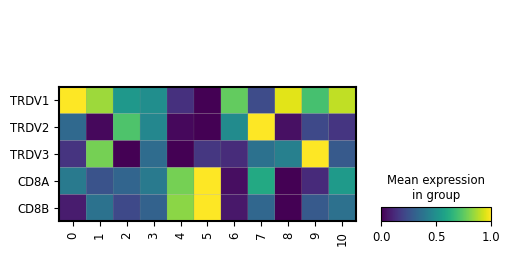

In [100]:
sc.pl.matrixplot(adata_j_TME_T_NK_subset_l7, var_names=['TRDV1', 'TRDV2', 'TRDV3', 'CD8A', 'CD8B',], groupby='sub3_leiden', standard_scale='var', swap_axes=True)


In [272]:
for tup in adata_j_TME_T_NK_subset_l7[adata_j_TME_T_NK_subset_l7.obs['sub2_leiden'].isin(['6', '9', '10'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'T'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'CD8+ T'
    
for tup in adata_j_TME_T_NK_subset_l7[adata_j_TME_T_NK_subset_l7.obs['sub2_leiden'].isin(['0', '1', '2', '3', '5', '7', '8'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'T'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'Vδ1+ T'
    
for tup in adata_j_TME_T_NK_subset_l7[adata_j_TME_T_NK_subset_l7.obs['sub2_leiden'].isin(['4'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'T'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'Vδ2+ T'
    
for tup in adata_j_TME_T_NK_subset_l7[adata_j_TME_T_NK_subset_l7.obs['sub2_leiden'].isin(['11'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'T'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'N/A'

### sub1_leiden 10 → Mixture of CD8 and CD4

In [102]:
adata_j_TME_T_NK_l10 = adata_j_TME_T_NK[adata_j_TME_T_NK.obs['sub1_leiden'].isin(['10'])].copy()
adata_j_TME_T_NK_l10 = adata_j_TME_T_NK_l10.raw.to_adata()

temp = list()
for SampleID, edf in adata_j_TME_T_NK_l10.obs.groupby('SampleID'):
    if len(edf) <= 1:
        temp.append( SampleID )
        dict_Identifier_to_lvl_1_CellType[edf.iloc[0].Identifier] = 'T'
        dict_Identifier_to_lvl_2_CellType[edf.iloc[0].Identifier] = 'N/A'

adata_j_TME_T_NK_l10 = adata_j_TME_T_NK_l10[~(adata_j_TME_T_NK_l10.obs['SampleID'].isin(temp))].copy()
adata_j_TME_T_NK_l10 = preprocess(adata_j_TME_T_NK_l10)

sc.tl.leiden(adata_j_TME_T_NK_l10, resolution=0.5, key_added='sub2_leiden')

/tmp/ipykernel_286411/3163593511.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for SampleID, edf in adata_j_TME_T_NK_l10.obs.groupby('SampleID'):
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


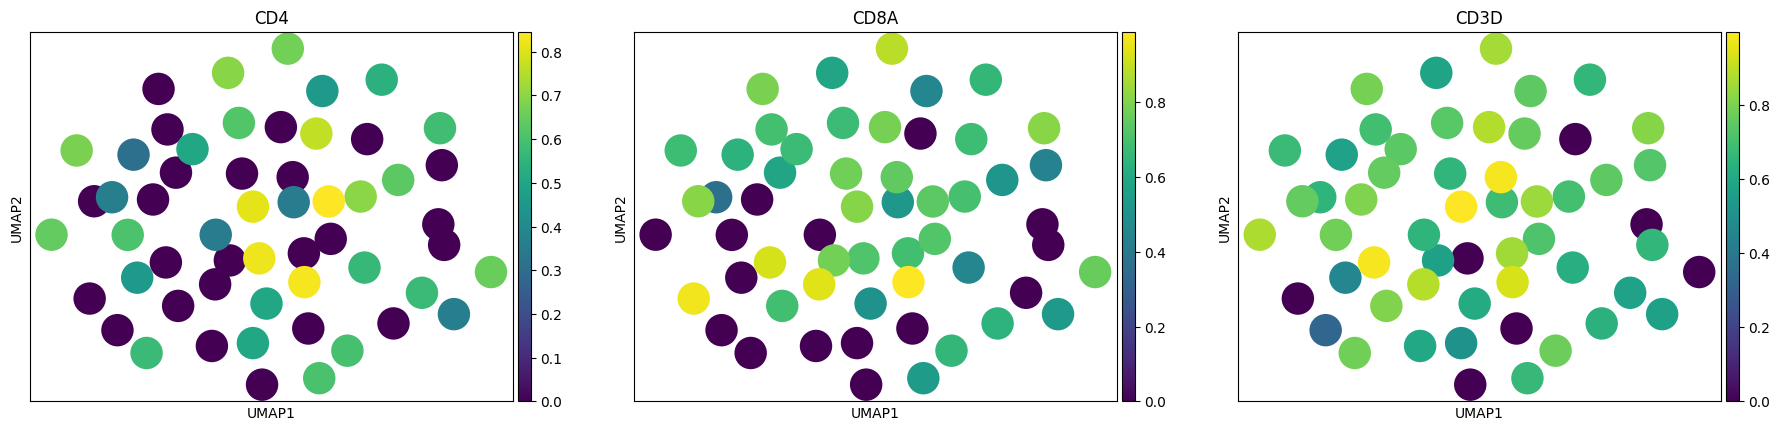

In [108]:
sc.pl.umap(adata_j_TME_T_NK_l10, color=['CD4', 'CD8A', 'CD3D'])

In [273]:
for tup in adata_j_TME_T_NK_l10.obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'T'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'N/A'

## Myeloid cells

In [123]:
adata_j_TME_myeloid = adata_j_TME[adata_j_TME.obs['leiden_res_0.1'].isin(['2', '9', '13'])].copy()
adata_j_TME_myeloid = adata_j_TME_myeloid.raw.to_adata()

temp = list()
for SampleID, edf in adata_j_TME_myeloid.obs.groupby('SampleID'):
    if len(edf) <= 1:
        temp.append( SampleID )
        dict_Identifier_to_lvl_1_CellType[edf.iloc[0].Identifier] = 'N/A'
        dict_Identifier_to_lvl_2_CellType[edf.iloc[0].Identifier] = 'N/A'

adata_j_TME_myeloid = adata_j_TME_myeloid[~(adata_j_TME_myeloid.obs['SampleID'].isin(temp))].copy()
adata_j_TME_myeloid = preprocess(adata_j_TME_myeloid)
sc.tl.leiden(adata_j_TME_myeloid, resolution=0.2, key_added='sub1_leiden')

/tmp/ipykernel_286411/103395695.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for SampleID, edf in adata_j_TME_myeloid.obs.groupby('SampleID'):


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


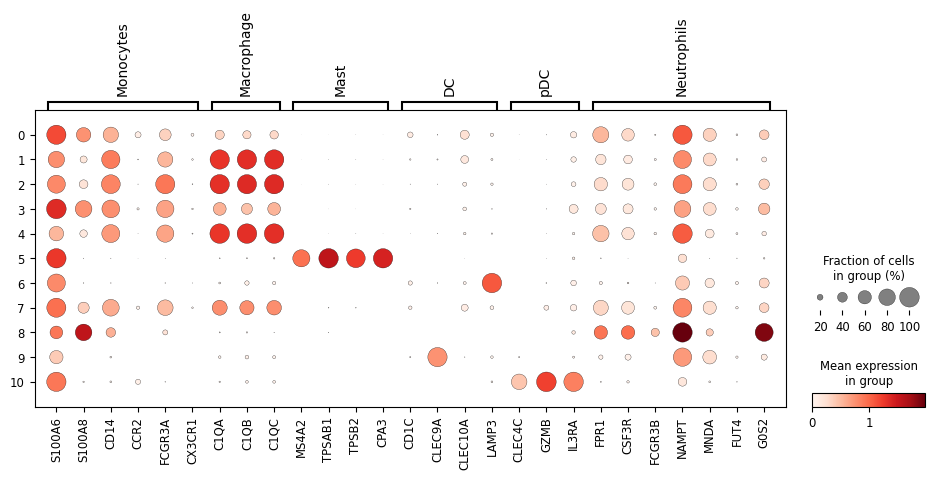

In [125]:
Myeloid_markers = { 'Monocytes' : ['S100A6', 'S100A8', 'CD14', 'CCR2', 'FCGR3A', 'CX3CR1'], 
                   'Macrophage' : ['C1QA', 'C1QB', 'C1QC'],
                   'Mast' :         ['MS4A2', 'TPSAB1', 'TPSB2', 'CPA3' ], 
                   'DC' : ['CD1C', 'CLEC9A', 'CLEC10A', 'LAMP3'],
                   'pDC' : ['CLEC4C', 'GZMB', "IL3RA", ], 
                   'Neutrophils' : ['FPR1', 'CSF3R', 'FCGR3B', 'NAMPT', 'MNDA', 'FUT4', 'G0S2'],
                   }

sc.pl.dotplot(adata_j_TME_myeloid, var_names=Myeloid_markers, groupby='sub1_leiden')

### sub1_leiden 5 → Mast

In [133]:
for tup in adata_j_TME_myeloid[adata_j_TME_myeloid.obs['sub1_leiden'].isin(['5'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Mast'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'Mast'

### sub1_leiden 10 → pDC

In [134]:
for tup in adata_j_TME_myeloid[adata_j_TME_myeloid.obs['sub1_leiden'].isin(['10'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Dendritic'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'pDC'

### sub1_leiden 1, 2, 3, 4, 7 → Macrophage

In [135]:
for tup in adata_j_TME_myeloid[adata_j_TME_myeloid.obs['sub1_leiden'].isin(['1', '2', '3', '4', '7'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Monocyte/Macrophage'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'Macrophage'

### sub1_leiden 0, 8 → Monocyte

In [141]:
for tup in adata_j_TME_myeloid[adata_j_TME_myeloid.obs['sub1_leiden'].isin(['0', '8',])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Monocyte/Macrophage'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'Monocyte'

### sub1_leiden 6, 9 → cDC

In [137]:
for tup in adata_j_TME_myeloid[adata_j_TME_myeloid.obs['sub1_leiden'].isin(['6', '9',])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Dendritic'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'cDC'

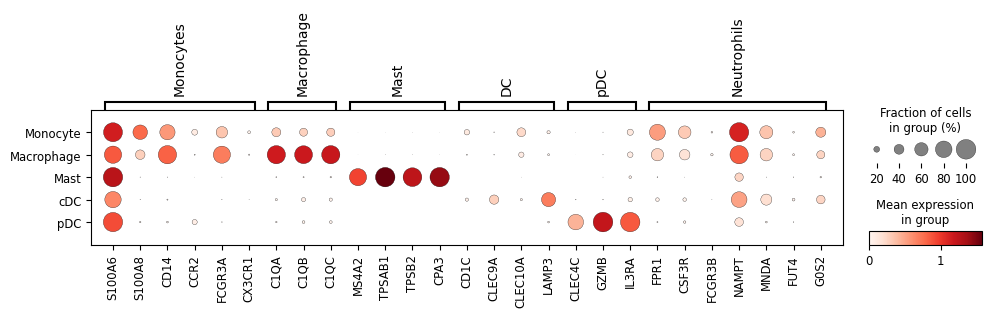

In [143]:
adata_j_TME_myeloid.obs['Manual_CellType_lvl_1'] = [ dict_Identifier_to_lvl_1_CellType[Identifier] for Identifier in adata_j_TME_myeloid.obs['Identifier'] ]
adata_j_TME_myeloid.obs['Manual_CellType_lvl_2'] = [ dict_Identifier_to_lvl_2_CellType[Identifier] for Identifier in adata_j_TME_myeloid.obs['Identifier'] ]
sc.pl.dotplot(adata_j_TME_myeloid, var_names=Myeloid_markers, groupby='Manual_CellType_lvl_2', categories_order=['Monocyte', 'Macrophage', 'Mast', 'cDC', 'pDC'])

## Epithelial cells

In [148]:
smillie_marker_converted = pd.read_csv('/node200data/18parkky/datasets/reference/marker_genes/colon/Smillie_et_al/entrez_id_conversion/colon_epithelial_marker.ensembl_id.csv')
dict_InitialAlias_to_GeneName = { tup.initial_alias : tup.name for tup in smillie_marker_converted.itertuples() }

smillie_marker = pd.read_csv(PATH_TO_SMILLIE_MARKER_GENES)
for gene in smillie_marker['gene']:
    try: dict_InitialAlias_to_GeneName[gene]
    except KeyError: dict_InitialAlias_to_GeneName[gene] = None
smillie_marker['gene'] = [ dict_InitialAlias_to_GeneName[gene] for gene in smillie_marker['gene'] ]
print(smillie_marker.shape[0])
smillie_marker.dropna(inplace=True)
print(smillie_marker.shape[0])
IntestinalEpiCellTypes = [ ident for ident in set(smillie_marker['ident']) if ident[:2] != 'E.' ]

3045
2666


In [149]:
adata_j_TME_epi = adata_j_TME[adata_j_TME.obs['leiden_res_0.1'].isin(['10'])].copy()
adata_j_TME_epi = adata_j_TME_epi.raw.to_adata()

temp = list()
for SampleID, edf in adata_j_TME_epi.obs.groupby('SampleID'):
    if len(edf) <= 1:
        temp.append( SampleID )
        dict_Identifier_to_lvl_1_CellType[edf.iloc[0].Identifier] = 'N/A'
        dict_Identifier_to_lvl_2_CellType[edf.iloc[0].Identifier] = 'N/A'
        
adata_j_TME_epi = adata_j_TME_epi[~(adata_j_TME_epi.obs['SampleID'].isin(temp))].copy()

sc.pp.normalize_total(adata_j_TME_epi)
sc.pp.log1p(adata_j_TME_epi)
sc.pp.highly_variable_genes(adata_j_TME_epi, n_top_genes=1000, batch_key="SampleID")

adata_j_TME_epi.raw = adata_j_TME_epi.copy()
adata_j_TME_epi = adata_j_TME_epi[:, adata_j_TME_epi.var.index.isin(smillie_marker['gene'])]

sc.pp.scale(adata_j_TME_epi, max_value=10)
sc.tl.pca(adata_j_TME_epi, svd_solver="arpack")

sc.pp.neighbors(adata_j_TME_epi, n_neighbors=50, n_pcs=40)
sc.tl.umap(adata_j_TME_epi, random_state=42)
sc.tl.leiden(adata_j_TME_epi, resolution=0.5, key_added='sub1_leiden')

/tmp/ipykernel_286411/2111112175.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for SampleID, edf in adata_j_TME_epi.obs.groupby('SampleID'):
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


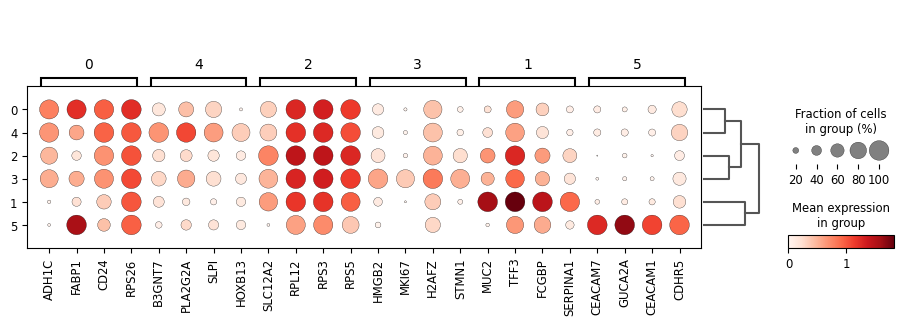

In [184]:
sc.tl.rank_genes_groups(adata_j_TME_epi, groupby='sub1_leiden', method='wilcoxon')
sc.pl.rank_genes_groups_dotplot(adata_j_TME_epi, groupby='sub1_leiden', n_genes=4)

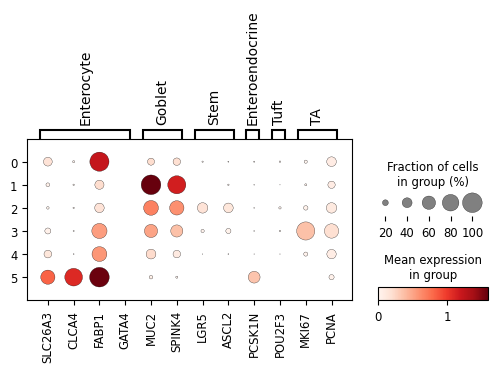

In [192]:
Epithelial_markers = {
    'Enterocyte' : ['SLC26A3', 'CLCA4', 'FABP1', 'GATA4'],
    'Goblet' : ['MUC2', 'SPINK4'],
    'Stem' : ['LGR5', 'ASCL2'],
    'Enteroendocrine' : ['PCSK1N'],
    'Tuft' : ['POU2F3'],
    'TA' : ['MKI67', 'PCNA'],
}

sc.pl.dotplot( adata_j_TME_epi, var_names=Epithelial_markers, groupby='sub1_leiden', swap_axes=False, )

### leiden 0, 4, 5 → Enterocytes

In [191]:
for tup in adata_j_TME_epi[adata_j_TME_epi.obs['sub1_leiden'].isin(['0', '4', '5'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Epithelial'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'Enterocytes'

### leiden 1, 2, 3 → Mixed population

In [193]:
# for tup in adata_j_TME_epi[adata_j_TME_epi.obs['sub1_leiden'].isin(['1', '2', '3'])].obs.itertuples():
#     dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Epithelial'
#     dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'Goblet cells'

adata_j_TME_epi_subset = adata_j_TME_epi[adata_j_TME_epi.obs['sub1_leiden'].isin( ['1', '2', '3'] )].copy()
adata_j_TME_epi_subset = adata_j_TME_epi_subset.raw.to_adata()

temp = list()
for SampleID, edf in adata_j_TME_epi_subset.obs.groupby('SampleID'):
    if len(edf) <= 1:
        print(SampleID, len(edf))
        temp.append( SampleID )
        dict_Identifier_to_lvl_1_CellType[edf.iloc[0].Identifier] = 'Epithelial'
        dict_Identifier_to_lvl_2_CellType[edf.iloc[0].Identifier] = 'N/A'

adata_j_TME_epi_subset = adata_j_TME_epi_subset[~(adata_j_TME_epi_subset.obs['SampleID'].isin(temp))].copy()

sc.pp.normalize_total(adata_j_TME_epi_subset)
sc.pp.log1p(adata_j_TME_epi_subset)
sc.pp.highly_variable_genes(adata_j_TME_epi_subset, n_top_genes=2000, batch_key="SampleID")

adata_j_TME_epi_subset.raw = adata_j_TME_epi_subset.copy()
adata_j_TME_epi_subset =  adata_j_TME_epi_subset[:, adata_j_TME_epi_subset.var.index.isin(smillie_marker[(smillie_marker['ident'].isin(['Goblet', 'Immature Goblet', 'TA 1', 'TA 2', 'Secretory TA', 'Stem']))]['gene'])]

sc.pp.scale(adata_j_TME_epi_subset, max_value=10)
sc.tl.pca(adata_j_TME_epi_subset, svd_solver="arpack")

sc.pp.neighbors(adata_j_TME_epi_subset, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata_j_TME_epi_subset, random_state=42)

/tmp/ipykernel_286411/2191844582.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for SampleID, edf in adata_j_TME_epi_subset.obs.groupby('SampleID'):
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


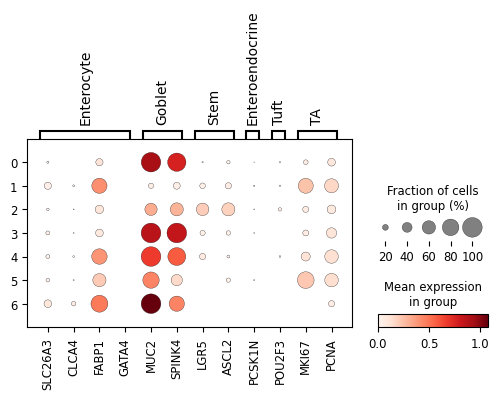

In [195]:
sc.tl.leiden(adata_j_TME_epi_subset, resolution=0.5, key_added='sub2_leiden')
sc.pl.dotplot( adata_j_TME_epi_subset, var_names=Epithelial_markers, groupby='sub2_leiden', swap_axes=False, )

In [196]:
for tup in adata_j_TME_epi_subset[adata_j_TME_epi_subset.obs['sub2_leiden'].isin(['0', '3', '4', '5', '6'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Epithelial'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'Goblet'
    
for tup in adata_j_TME_epi_subset[adata_j_TME_epi_subset.obs['sub2_leiden'].isin(['1'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Epithelial'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'TA'
    
for tup in adata_j_TME_epi_subset[adata_j_TME_epi_subset.obs['sub2_leiden'].isin(['2'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Epithelial'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'Stem'

## Stromal cells

In [215]:
Stromal_markers = {
    'Endothelial' : ['VWF', 'CDH5', 'ACE', 'PECAM1'], # SELP = CD62P
    'Fibroblast' : ['COL1A2', 'COL3A1', 'VIM', 'ADAMDEC1', 'DCN', 'SLIT2', 'CXCL12', 'F3', 'SOX6', 'PDGFRA' ],
    'Pericyte' : ['CSPG4', 'RGS5','PDGFRB', 'ACTA2', 'DES'], # CSPG4 = NG2
    'SMC' : ['MYH11', 'CNN1'],
}

In [197]:
adata_j_TME_stromal = adata_j_TME[adata_j_TME.obs['leiden_res_0.1'].isin(['5', '7', '8', '11'])].copy()
adata_j_TME_stromal = adata_j_TME_stromal.raw.to_adata()

In [198]:
adata_j_TME_stromal = preprocess(adata_j_TME_stromal, n_neighbors=20)

/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


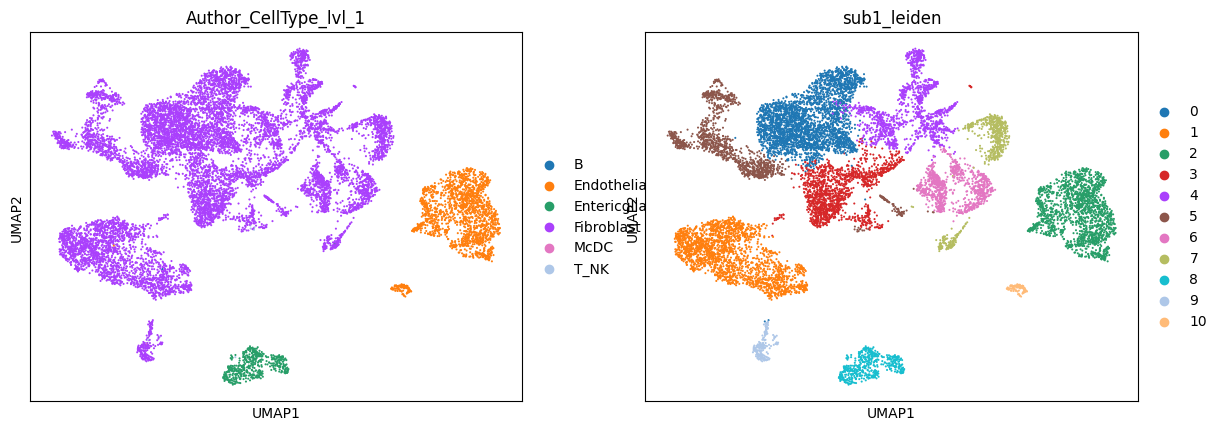

In [199]:
sc.tl.leiden(adata_j_TME_stromal, resolution=0.2, key_added='sub1_leiden')
sc.pl.umap(adata_j_TME_stromal, color=['Author_CellType_lvl_1', 'sub1_leiden',], ncols=2)

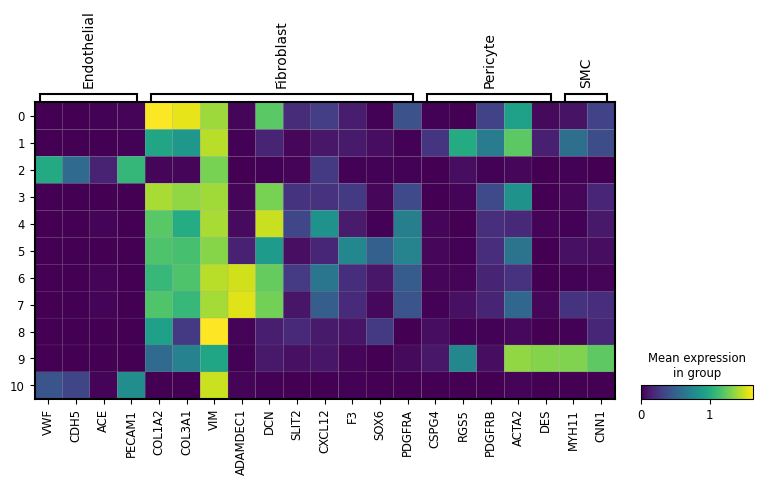

In [216]:
sc.pl.matrixplot(adata_j_TME_stromal, var_names=Stromal_markers, groupby='sub1_leiden')

### sub1_leiden 2, 10 → Endothelial

In [227]:
for tup in adata_j_TME_stromal[(adata_j_TME_stromal.obs['sub1_leiden'].isin(['2', '10']))].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Stromal'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'Endothelial'

### sub1_leiden 8 → Entericglial cells

In [222]:
for tup in adata_j_TME_stromal[(adata_j_TME_stromal.obs['sub1_leiden'].isin(['8']))].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Stromal'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'Glial'

### Other sub1_leidens → Mixed population

In [202]:
adata_j_TME_stromal_subset = adata_j_TME_stromal[~(adata_j_TME_stromal.obs['sub1_leiden'].isin(['2', '8', '10']))].copy()
adata_j_TME_stromal_subset = adata_j_TME_stromal_subset.raw.to_adata()

temp = list()
for SampleID, edf in adata_j_TME_stromal_subset.obs.groupby('SampleID'):
    if len(edf) <= 1:
        temp.append( SampleID )
        dict_Identifier_to_lvl_1_CellType[edf.iloc[0].Identifier] = 'Stromal'
        dict_Identifier_to_lvl_2_CellType[edf.iloc[0].Identifier] = 'N/A'

adata_j_TME_stromal_subset = adata_j_TME_stromal_subset[~(adata_j_TME_stromal_subset.obs['SampleID'].isin(temp))].copy()
adata_j_TME_stromal_subset = preprocess(adata_j_TME_stromal_subset, )

sc.tl.leiden(adata_j_TME_stromal_subset, resolution=0.2, key_added='sub2_leiden')

/tmp/ipykernel_286411/635796453.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for SampleID, edf in adata_j_TME_stromal_subset.obs.groupby('SampleID'):


/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_highly_variable_genes.py:305: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:316: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


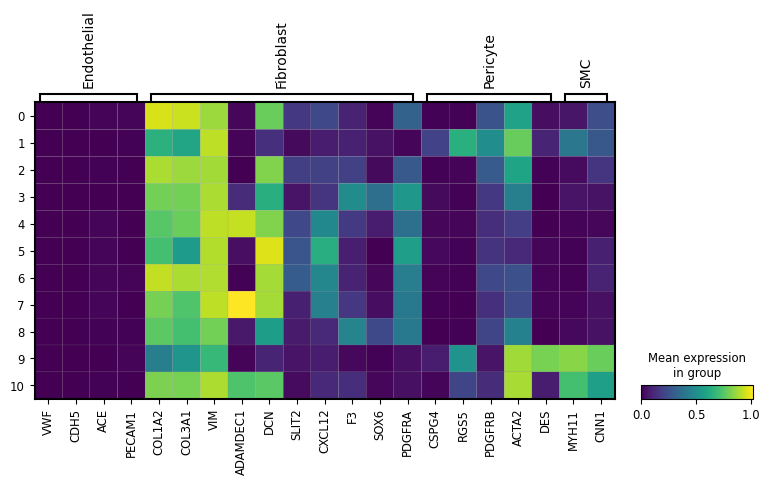

In [217]:
sc.pl.matrixplot(adata_j_TME_stromal_subset, var_names=Stromal_markers, groupby='sub2_leiden')

#### sub2_leiden 1 → Pericyte

In [208]:
for tup in adata_j_TME_stromal_subset[adata_j_TME_stromal_subset.obs['sub2_leiden'].isin(['1'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Stromal'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'Pericyte'

#### sub2_leiden 9, 10 → SMC

In [209]:
for tup in adata_j_TME_stromal_subset[adata_j_TME_stromal_subset.obs['sub2_leiden'].isin(['9', '10'])].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Stromal'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'SMC'

#### Other sub2_leidens → Fibroblasts

In [210]:
for tup in adata_j_TME_stromal_subset[~(adata_j_TME_stromal_subset.obs['sub2_leiden'].isin(['1', '9', '10']))].obs.itertuples():
    dict_Identifier_to_lvl_1_CellType[tup.Identifier] = 'Stromal'
    dict_Identifier_to_lvl_2_CellType[tup.Identifier] = 'Fibroblast'

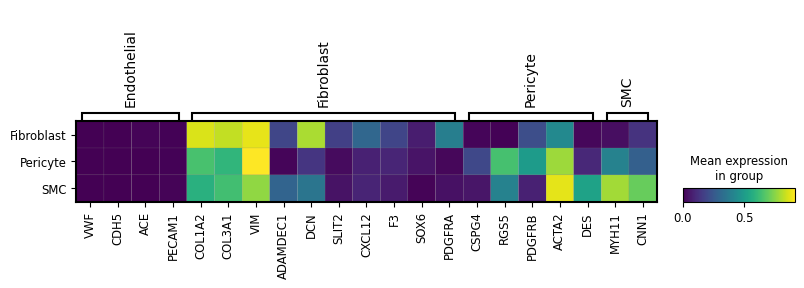

In [225]:
adata_j_TME_stromal_subset.obs['Manual_CellType_lvl_1'] = [ dict_Identifier_to_lvl_1_CellType[Identifier] for Identifier in adata_j_TME_stromal_subset.obs['Identifier'] ]
adata_j_TME_stromal_subset.obs['Manual_CellType_lvl_2'] = [ dict_Identifier_to_lvl_2_CellType[Identifier] for Identifier in adata_j_TME_stromal_subset.obs['Identifier'] ]
sc.pl.matrixplot(adata_j_TME_stromal_subset, var_names=Stromal_markers, groupby='Manual_CellType_lvl_2')

## Label results

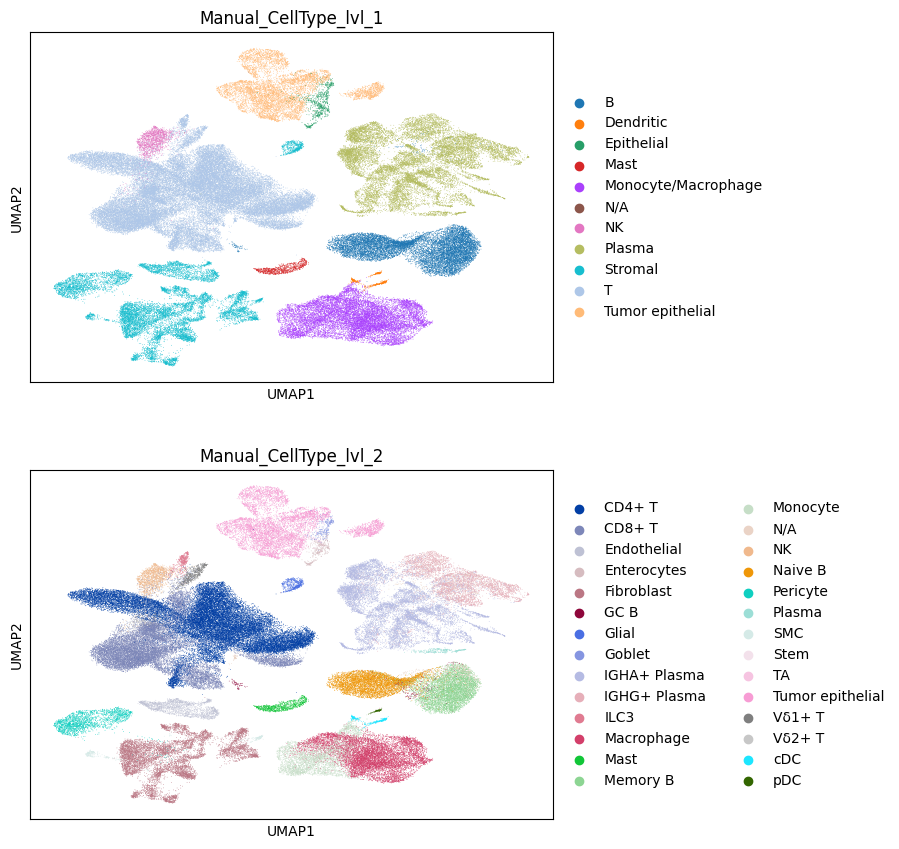

In [297]:
for Identifier in adata_j.obs['Identifier']:
    try: 
        dict_Identifier_to_lvl_1_CellType[Identifier]
        dict_Identifier_to_lvl_2_CellType[Identifier]
    except KeyError:
        dict_Identifier_to_lvl_1_CellType[Identifier] = 'Tumor epithelial'
        dict_Identifier_to_lvl_2_CellType[Identifier] = 'Tumor epithelial'
    
adata_j.obs['Manual_CellType_lvl_1'] = [ dict_Identifier_to_lvl_1_CellType[Identifier] for Identifier in adata_j.obs['Identifier'] ]
adata_j.obs['Manual_CellType_lvl_2'] = [ dict_Identifier_to_lvl_2_CellType[Identifier] for Identifier in adata_j.obs['Identifier'] ]

sc.pl.umap(adata_j, color=['Manual_CellType_lvl_1', 'Manual_CellType_lvl_2'], ncols=1)

In [ ]:
dict_ManualCellType_lvl_3 = {
    'CD4+ T' : 'CD4+ T',
    'CD8+ T' : 'CD8+ T',
    'Endothelial' : 'Stromal',
    'Enterocytes' : 'Epithelial',
    'Fibroblast' : 'Stromal',
    'GC B' : 'B',
    'Glial' : 'Stromal',
    'Goblet' : 'Epithelial',
    'IGHA+ Plasma' : 'B',
    'IGHG+ Plasma' : 'B',
    'ILC3' : 'ILC',
    'Macrophage' : 'Myeloid',
    'Mast' : 'Myeloid',
    'Memory B' : 'B',
    'Monocyte' : 'Myeloid',
    'N/A' : 'N/A',
    'NK' : 'ILC',
    'Naive B' : 'B',
    'Pericyte' : 'Stromal',
    'Plasma' : 'B',
    'SMC' : 'Stromal',
    'Stem' : 'Epithelial',
    'TA' : 'Epithelial',
    'Tumor epithelial' : 'Epithelial',
    'cDC' : 'Myeloid',
    'Vδ1+ T' : 'CD8+ T',
    'Vδ2+ T' : 'CD8+ T',
    'pDC' : 'Myeloid',
    'cDC' : 'Myeloid'
}

adata_j.obs['Manual_CellType_lvl_3'] = [ dict_ManualCellType_lvl_3[Manual_CellType_lvl_2] for Manual_CellType_lvl_2 in adata_j.obs['Manual_CellType_lvl_2'] ]
adata_j_TME.obs['Manual_CellType_lvl_3'] = [ dict_ManualCellType_lvl_3[Manual_CellType_lvl_2] for Manual_CellType_lvl_2 in adata_j_TME.obs['Manual_CellType_lvl_2'] ]



/home/18parkky/anaconda3-2021.11/envs/sc/lib/python3.12/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


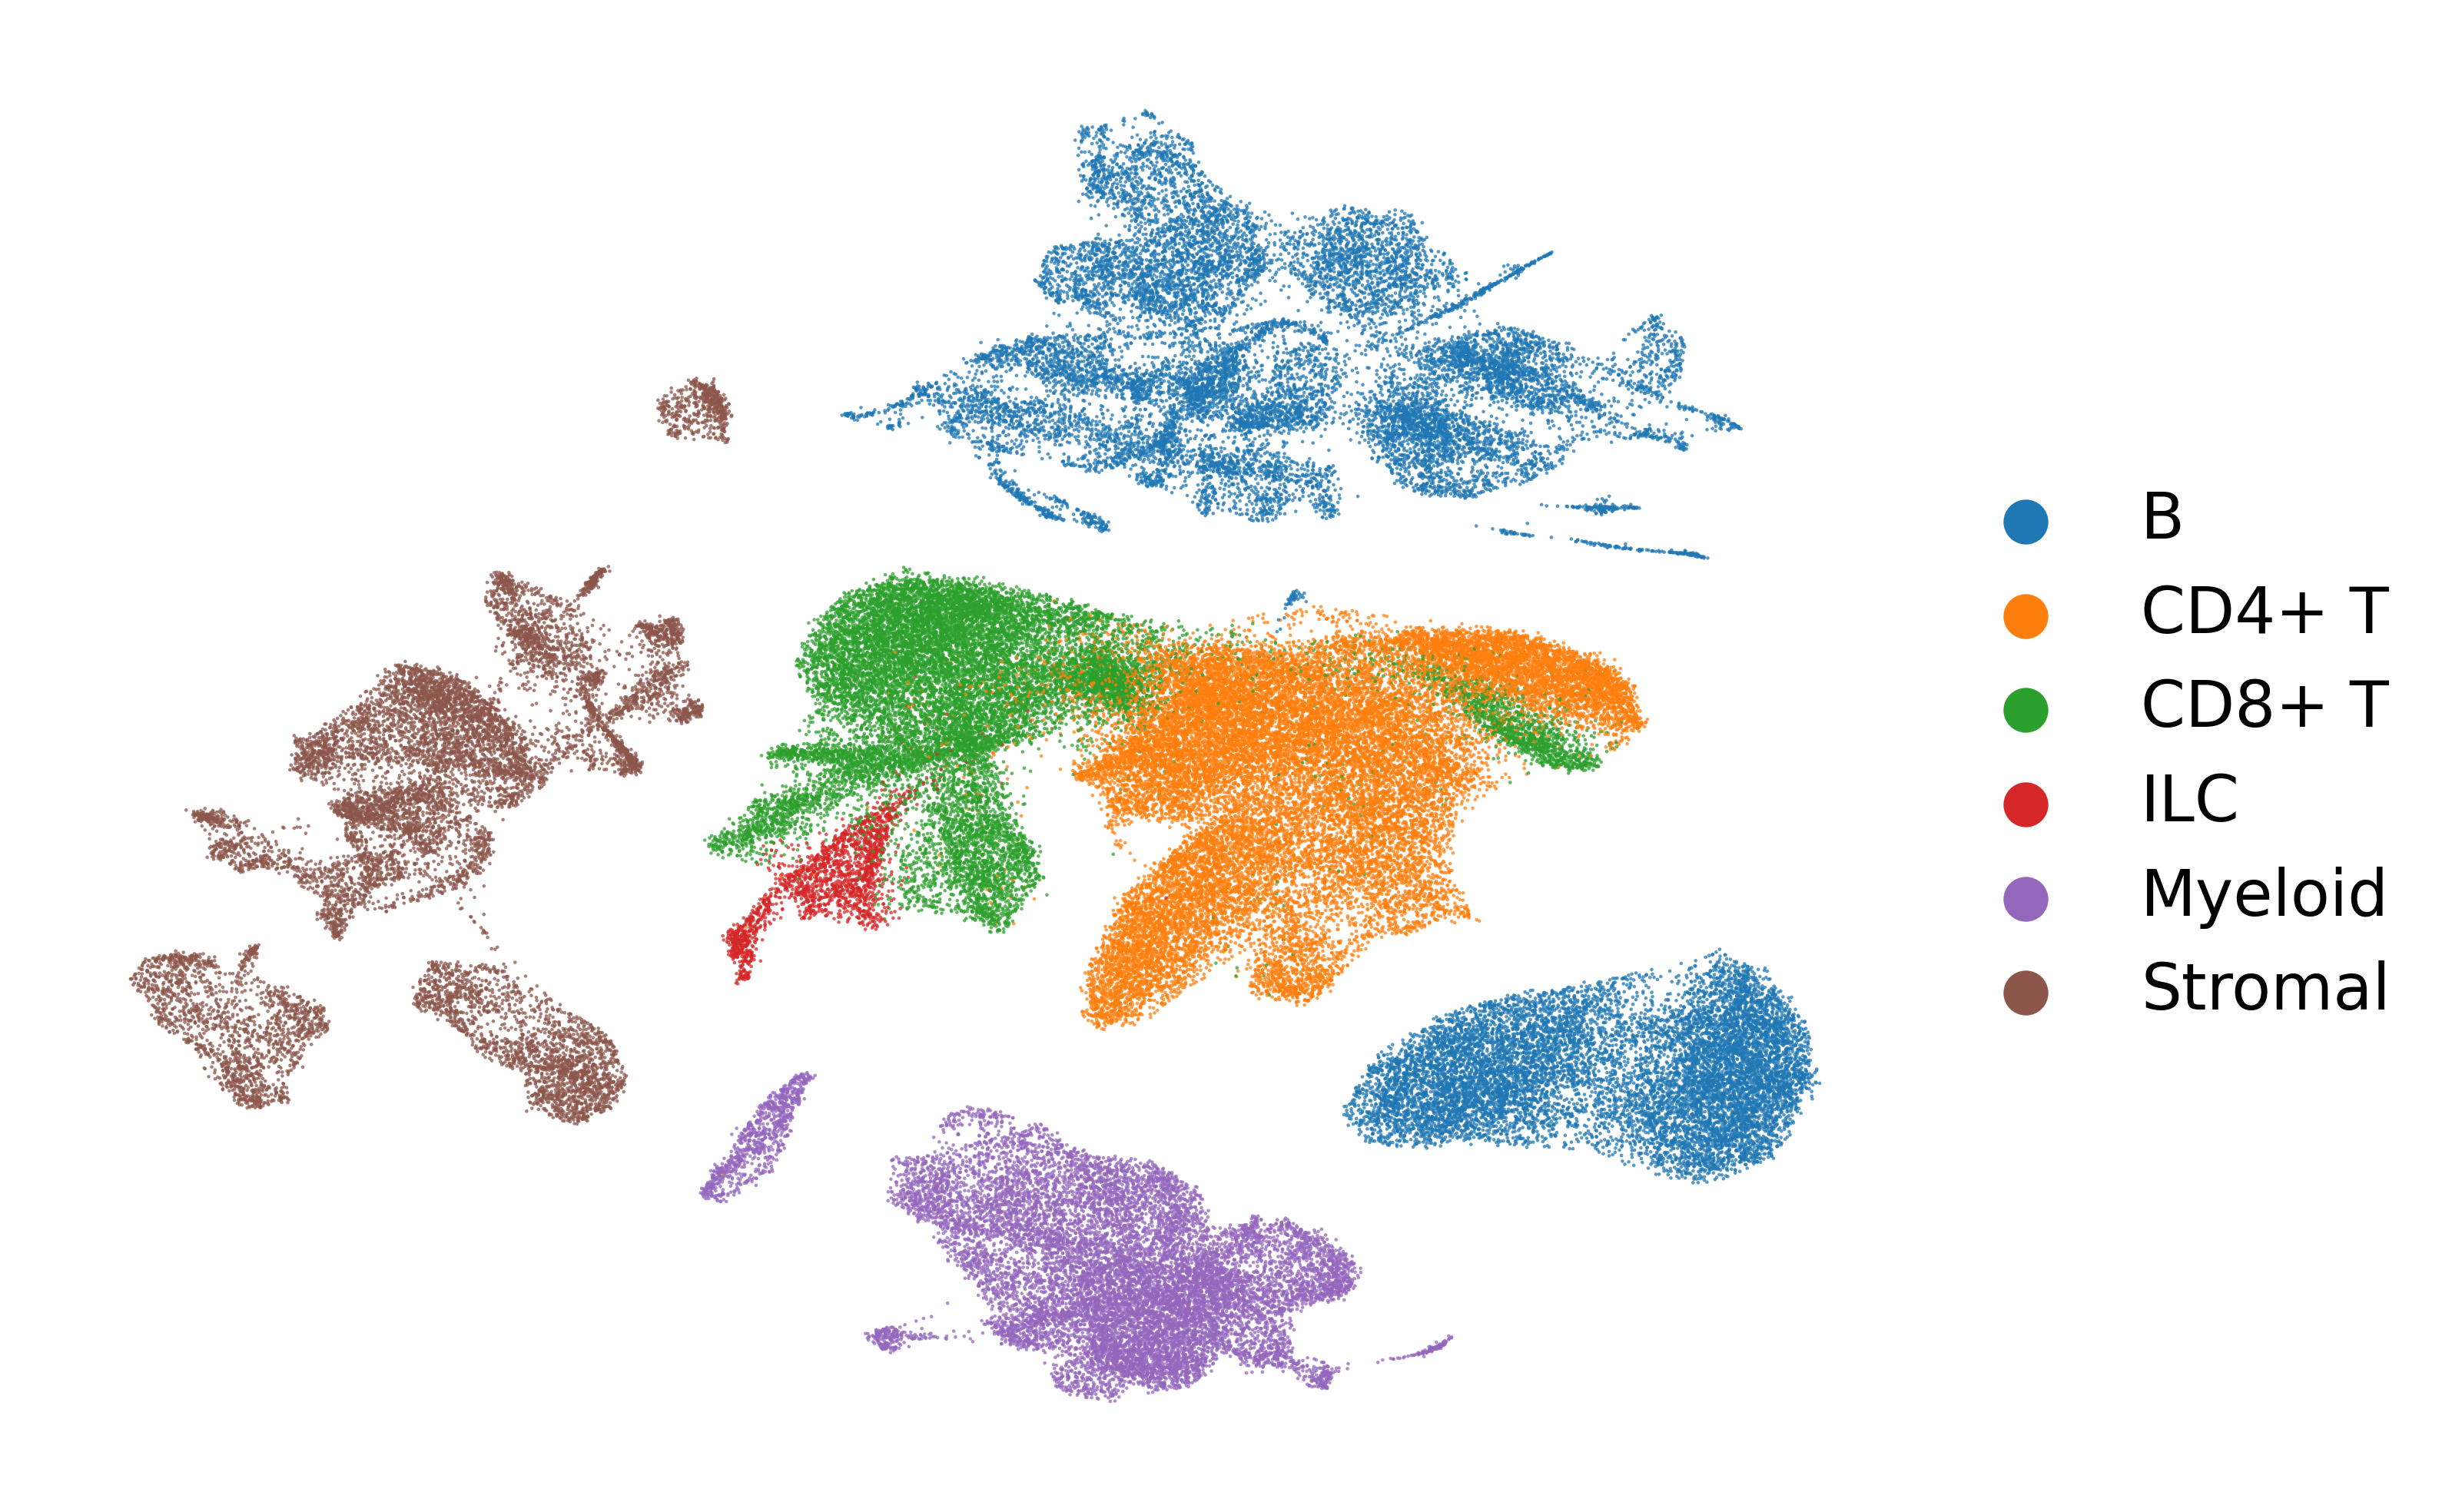

In [318]:
with plt.rc_context({"figure.dpi": (600), 'figure.figsize':(5.2, 4)}):
    sc.pl.umap(adata_j_TME[~(adata_j_TME.obs['Manual_CellType_lvl_3'].isin(['N/A', 'Epithelial']))], 
               color=['Manual_CellType_lvl_3'], 
               frameon=False, 
               alpha=0.75,
               title='',
               )
plt.show()

In [299]:
adata_j.write(f'{DIRECTORY_OUT}/adata_j.preprocessed.NanoMnT.TumorLabeled.CellTypeAnnot.h5ad')

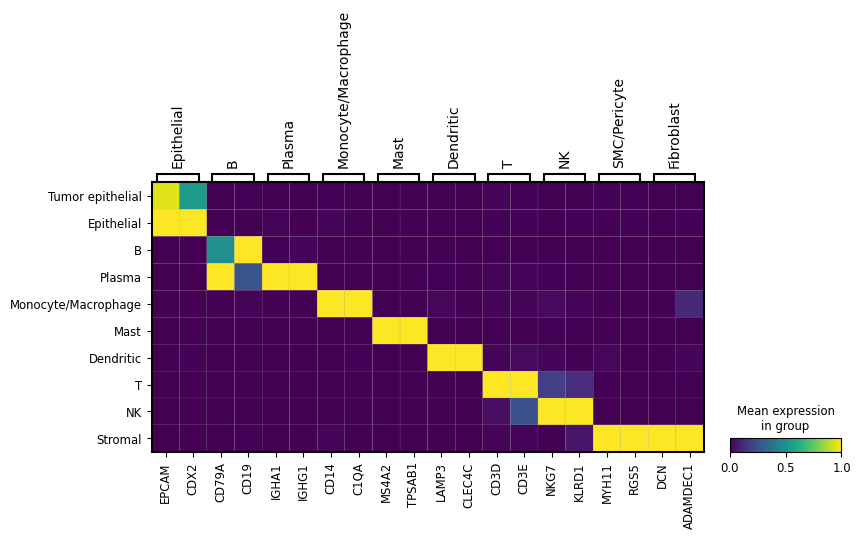

In [304]:
sc.pl.matrixplot(adata_j[adata_j.obs['Manual_CellType_lvl_1']!='N/A'], groupby='Manual_CellType_lvl_1', 
              var_names={
                  'Epithelial' : ['EPCAM', 'CDX2'],
                  'B' : ['CD79A', 'CD19'],
                  'Plasma' : [ 'IGHA1', 'IGHG1'],
                  'Monocyte/Macrophage' : ['CD14', 'C1QA'],
                  'Mast' : ['MS4A2', 'TPSAB1'],
                  'Dendritic' : ['LAMP3', 'CLEC4C'],
                  'T' : ['CD3D', 'CD3E',],
                  'NK' : ['NKG7', 'KLRD1'],
                  'SMC/Pericyte' : ['MYH11', 'RGS5'],
                  'Fibroblast' : ['DCN', 'ADAMDEC1'],
              }, 
              categories_order=['Tumor epithelial', 'Epithelial', 'B', 'Plasma', 'Monocyte/Macrophage', 'Mast', 'Dendritic', 'T', 'NK', 'Stromal'], 
              standard_scale='var',
              )
